# Data Cleaning & Engineering

In [4]:
import pandas as pd

# kaggle link to dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

data = pd.read_csv('creditcard.csv')

In [5]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
26783,34250.0,0.971148,-1.342579,-0.180686,-0.699957,-1.242629,-0.765359,-0.175028,-0.138303,-0.820207,...,-0.300728,-0.846033,-0.169486,0.383436,0.197450,1.436945,-0.150555,0.015750,218.00,0
106176,69857.0,1.173956,0.690657,0.222121,2.420659,0.133780,-0.647610,0.446488,-0.132486,-1.282421,...,0.045925,0.063547,-0.087216,0.525982,0.662600,0.039817,-0.044990,0.001064,1.88,0
178429,123622.0,1.787564,-0.650766,-0.532917,0.235670,-0.626819,-0.322419,-0.437460,0.058614,1.135481,...,-0.043623,-0.268983,0.224408,-0.404522,-0.408638,-0.941220,0.032465,-0.024307,100.00,0
1404,1084.0,-0.327426,0.377346,1.044564,-0.821649,-0.938044,-0.416148,2.082513,-0.958191,-1.466671,...,-0.774607,-1.402097,0.037759,0.334190,-0.311227,0.054431,-0.448106,-0.465675,229.90,0
73415,55126.0,-0.464099,0.307676,1.938888,-0.303877,-0.660238,-0.968385,0.219990,0.090122,0.301478,...,0.180230,0.321126,0.215063,0.686484,-1.031203,0.101572,0.131824,0.200293,39.74,0


In [6]:
# Looking at dtypes to see if we can perform any conversions
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

No conversions need to be made.

NOTE: The unknown columns have already been scaled.

In [7]:
import pandas as pd

numeric_columns = data.loc[:, 'V1':'V28']

statistics = numeric_columns.describe()

print(statistics)

                 V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  2.239053e-15   
std    1.332271e+00  1.237094e+00  1.194353e+00  1.

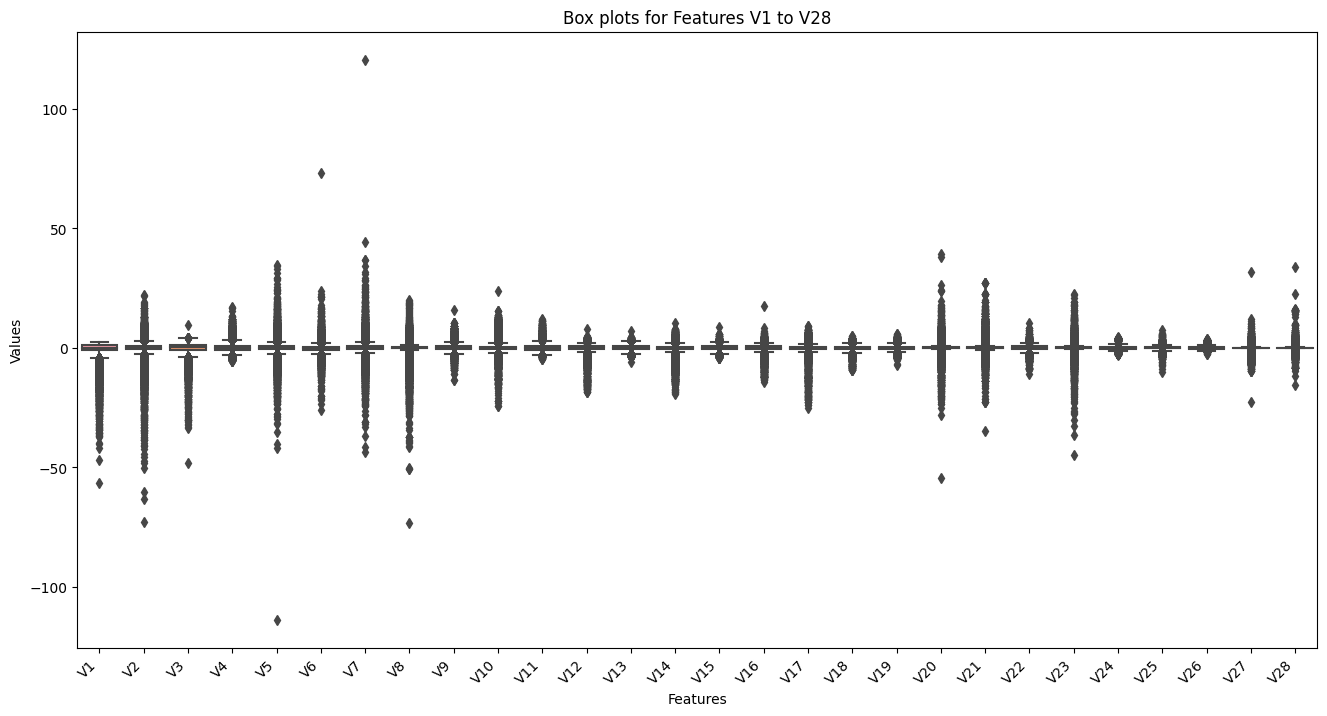

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = data.loc[:, 'V1':'V28']

# trying to see if there are any glaring outliers for any of the anon features
plt.figure(figsize=(16, 8))
sns.boxplot(data=numeric_columns)
plt.title('Box plots for Features V1 to V28')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.show()

In [9]:
#missing values check
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
import pandas as pd

# Checking the distribution of output labels

fraud_cases = data['Class'].sum()
non_fraud_cases = len(data) - fraud_cases

fraud_percentage = (fraud_cases / len(data)) * 100
non_fraud_percentage = 100 - fraud_percentage

skewness = data['Class'].skew()

print("Number of fraud cases:", fraud_cases)
print("Number of non-fraud cases:", non_fraud_cases)
print("Percentage of fraud cases:", fraud_percentage, "%")
print("Percentage of non-fraud cases:", non_fraud_percentage, "%")
print("Skewness of 'Class' column:", skewness)

Number of fraud cases: 492
Number of non-fraud cases: 284315
Percentage of fraud cases: 0.1727485630620034 %
Percentage of non-fraud cases: 99.827251436938 %
Skewness of 'Class' column: 23.99757931064749


We should not use the dataset as it is, because it is overfit and biased towards non-fraud cases.

## Amount

In [11]:
# Looking at the data stats to see what can be used in binning (if we will need it in plots)
data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

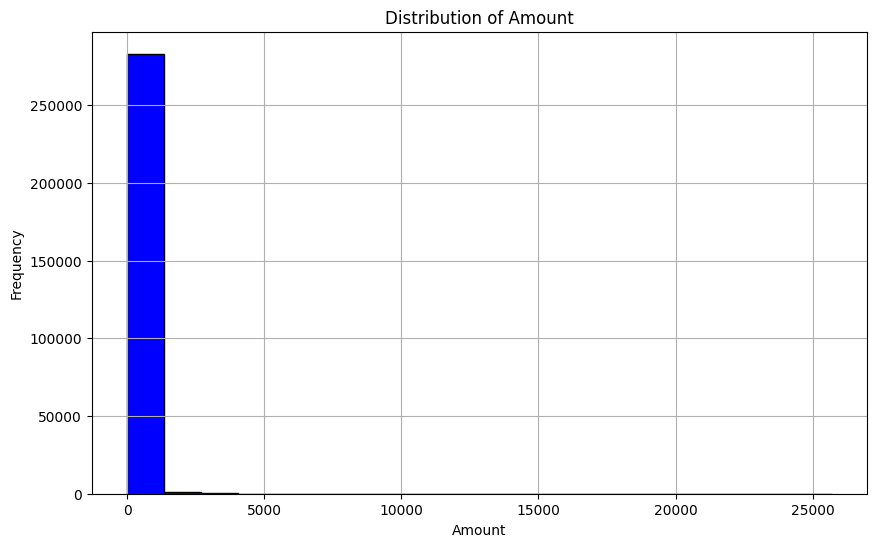

In [12]:
import matplotlib.pyplot as plt
import numpy as np

amount_data = data['Amount']

# Calculate the number of bins using Sturges' Rule:

bins = int(1 + np.log2(len(amount_data)))

# Sturges' Rule suggests that you can estimate the number of bins for a histogram
# by taking the base-2 logarithm of the total number of data points and adding 1 to it.


plt.figure(figsize=(10, 6))
plt.hist(amount_data, bins=bins, color='blue', edgecolor='black')

plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Time

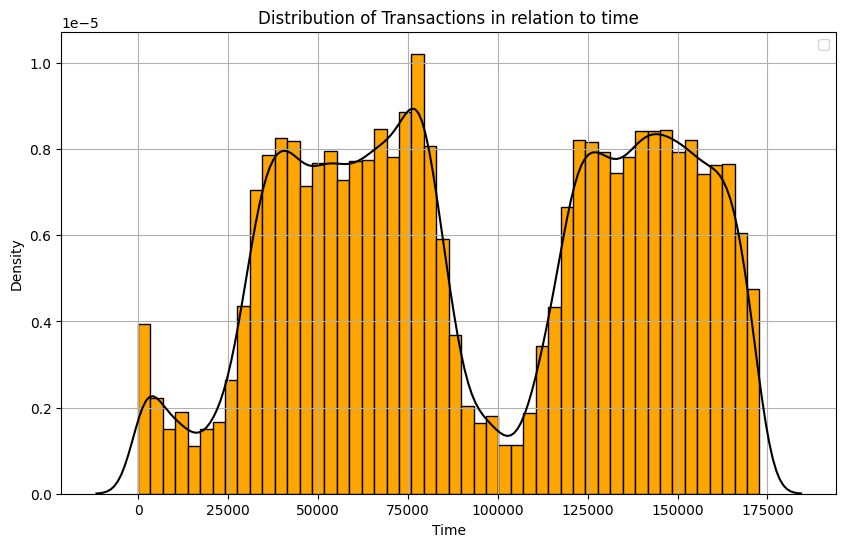

In [13]:
# plotting BEFORE conversion

import seaborn as sns

time_data = data['Time']

plt.figure(figsize=(10, 6))

plt.hist(time_data, bins=50, color='orange', edgecolor='black', density=True)
sns.kdeplot(time_data, color='black', linestyle='-')

plt.title('Distribution of Transactions in relation to time')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
time_counts = data['Time'].value_counts()
print("Unique Values and Their Counts in 'Time' column:")
print(time_counts)

Unique Values and Their Counts in 'Time' column:
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64


Fairly even. Nothing stands out.

## Feature scaling

Since time between transactions will be a factor in our ML model, it needs to be scaled.

The datetime conversion will complicate matters so the column is best left as an integer.

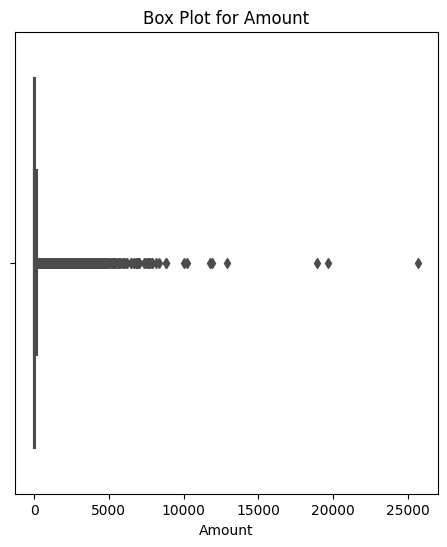

In [15]:
# Outlier detection via graph

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Amount'], color='blue')
plt.title('Box Plot for Amount')

plt.show()

Some outliers can be spotted. Robust Scaler would be more favorable to handle this case.

In [16]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

data['amount_scaled'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['time_scaled'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [17]:
data.drop(['Time','Amount'], axis=1, inplace=True)

In [18]:
data.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
259252,-0.763093,0.788439,2.258728,0.085364,-0.279818,-0.476665,0.352011,-0.011532,0.030761,-0.737019,...,-0.307737,-0.194857,0.381863,0.144157,-0.353448,-0.026472,0.087821,0,-0.167819,0.873330
157761,-2.871755,-0.085030,3.018941,4.869407,0.683470,0.711464,-1.021359,-0.836470,1.365602,2.673721,...,0.315226,0.487350,-0.108904,0.309117,0.562481,0.706176,0.052202,0,-0.233215,0.302048
159043,2.165090,-0.548098,-1.281122,-0.622709,-0.614283,-1.240892,-0.515461,-0.320515,-0.290950,0.235836,...,0.431734,0.133492,-0.086579,-0.086440,-0.197345,0.007494,-0.024055,0,-0.014393,0.322454
28941,-0.895992,0.414046,2.053618,0.791978,0.819844,-0.274974,0.606052,-0.031369,-0.109730,-0.404017,...,-0.058873,-0.308467,0.060012,0.525579,-0.304084,-0.106101,-0.153412,0,-0.293440,-0.580916
131035,-0.620106,0.127955,1.290485,-1.486800,-0.179125,-1.847375,0.625581,-0.296789,-1.668343,0.064203,...,-0.513178,-0.074234,0.919140,-0.024453,0.888095,-0.035723,0.090123,0,-0.181653,-0.061161


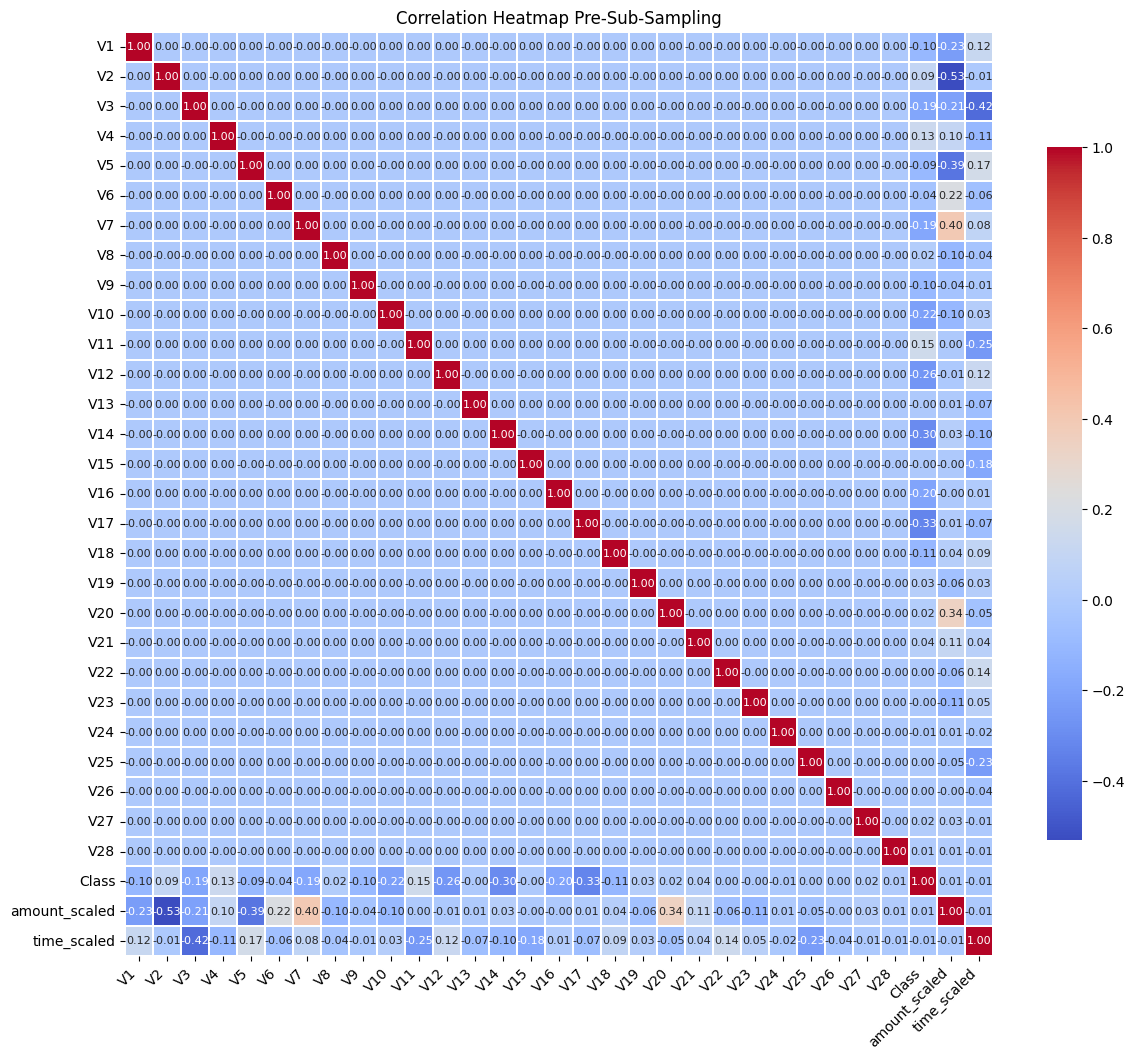

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.1, cbar_kws={"shrink": 0.75}, annot_kws={"size": 8})
plt.title('Correlation Heatmap Pre-Sub-Sampling')
plt.xticks(rotation=45, ha='right')
plt.show()

No notable correlation(s) between features pre-sampling.

# Machine Learning

## Sampling, splitting and handling imbalances

In [20]:
import pandas as pd
import numpy as np

positive_cases = data[data['Class'] == 1]
negative_cases = data[data['Class'] == 0]

# Sample 492 random negative cases
random_negative_cases = negative_cases.sample(n=len(positive_cases), random_state=42)

# Concatenate positive and negative cases to create a balanced dataset
balanced_data = pd.concat([positive_cases, random_negative_cases])

# Shuffle
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [21]:
class_counts = balanced_data['Class'].value_counts()
print(class_counts)

0    492
1    492
Name: Class, dtype: int64


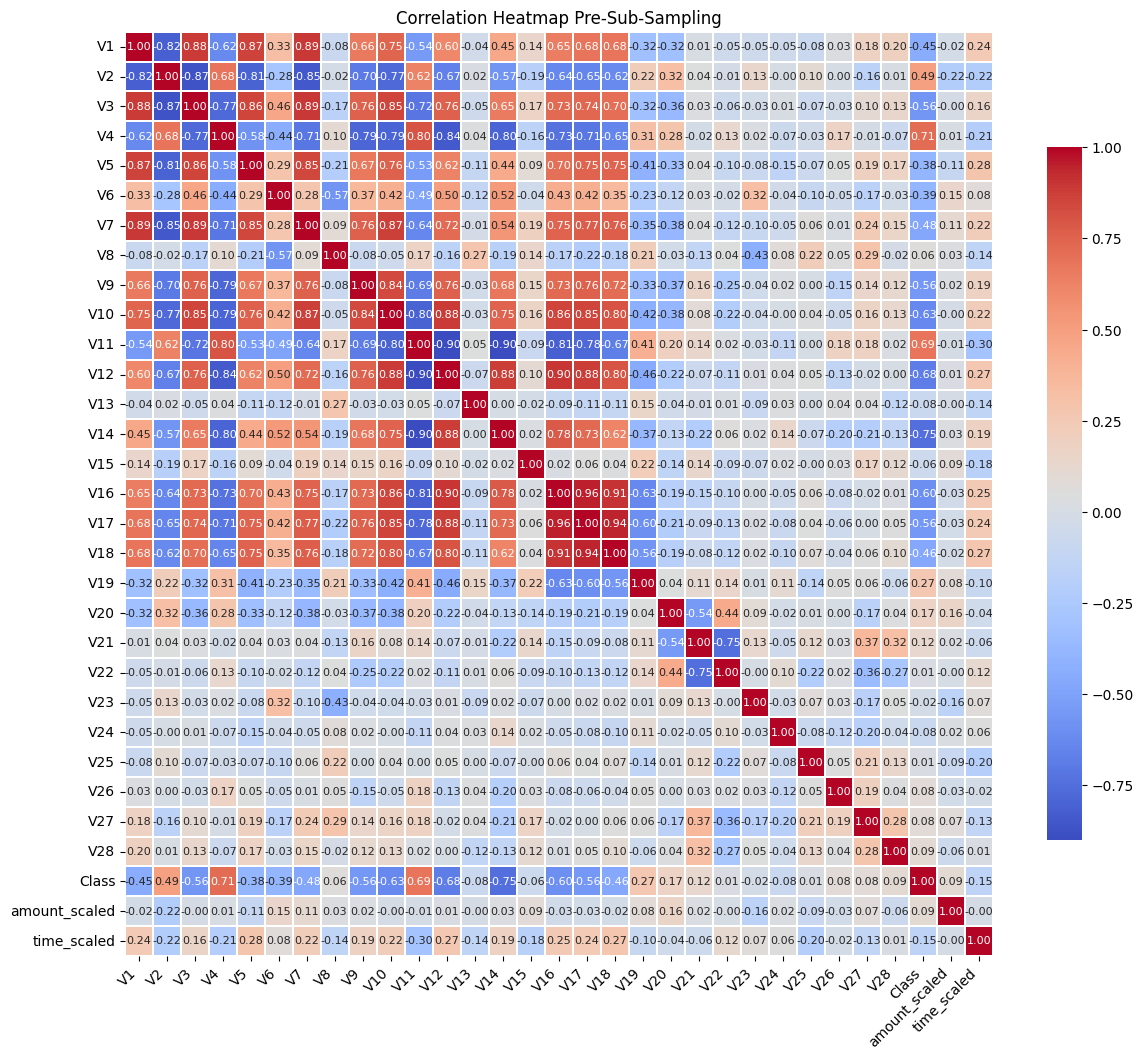

In [22]:
correlation_matrix = balanced_data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.1, cbar_kws={"shrink": 0.75}, annot_kws={"size": 8})
plt.title('Correlation Heatmap Pre-Sub-Sampling')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
correlations = balanced_data.corr()['Class'].abs().sort_values(ascending=False)

# Features most correlated with output:
print(correlations)

Class            1.000000
V14              0.749228
V4               0.712610
V11              0.685056
V12              0.682039
V10              0.628327
V16              0.597790
V3               0.564371
V9               0.559589
V17              0.559169
V2               0.491904
V7               0.477730
V18              0.464857
V1               0.446093
V6               0.389257
V5               0.382234
V19              0.267809
V20              0.169025
time_scaled      0.149122
V21              0.124708
amount_scaled    0.094434
V28              0.093970
V24              0.084566
V26              0.084471
V27              0.079840
V13              0.078165
V15              0.057636
V8               0.057207
V23              0.022999
V22              0.014889
V25              0.012415
Name: Class, dtype: float64


Now we notice there are stronger correlations after Sub-Sampling.
Most notably: V14, V4, V12, V11, V10, V16

## Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split

X = balanced_data.drop(columns='Class', axis=1)
Y = balanced_data['Class']

# Splitting the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, Y_train)

Y_pred = logreg_model.predict(X_test)

In [26]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.934010152284264
Confusion Matrix:
[[ 83   4]
 [  9 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        87
           1       0.96      0.92      0.94       110

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



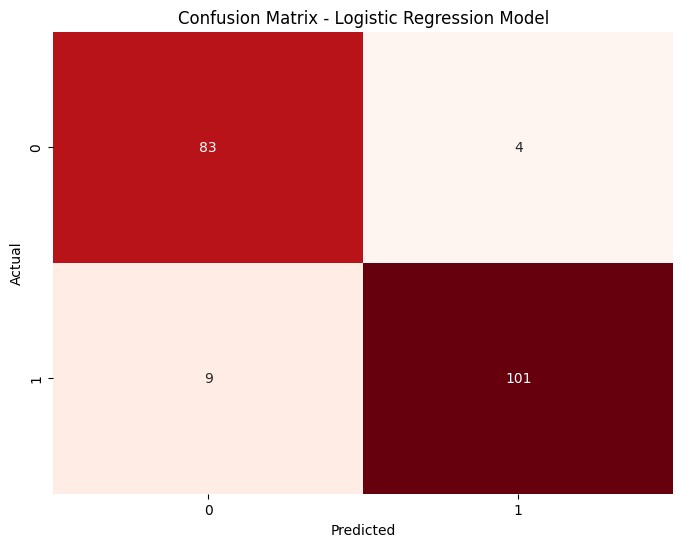

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_test)

In [29]:
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
classification_rep_knn = classification_report(Y_test, Y_pred_knn)

print("K-Nearest Neighbors (KNN) Model:")
print(f"Accuracy: {accuracy_knn}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("Classification Report:")
print(classification_rep_knn)

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.9289340101522843
Confusion Matrix:
[[84  3]
 [11 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        87
           1       0.97      0.90      0.93       110

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



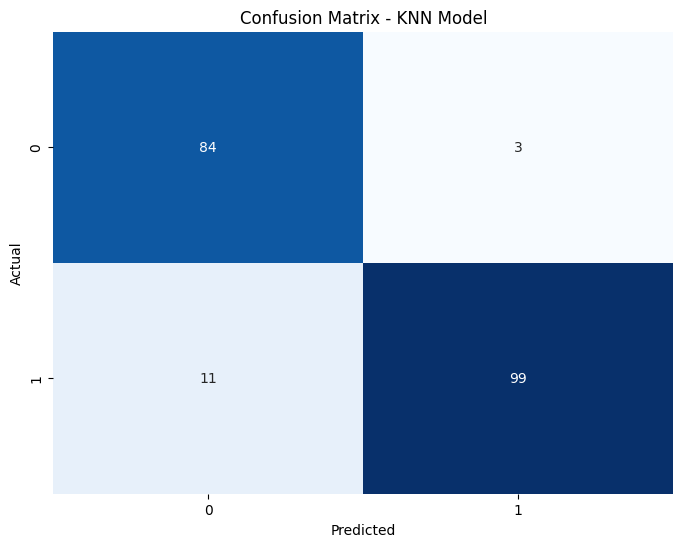

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Conclusions & Comparisons

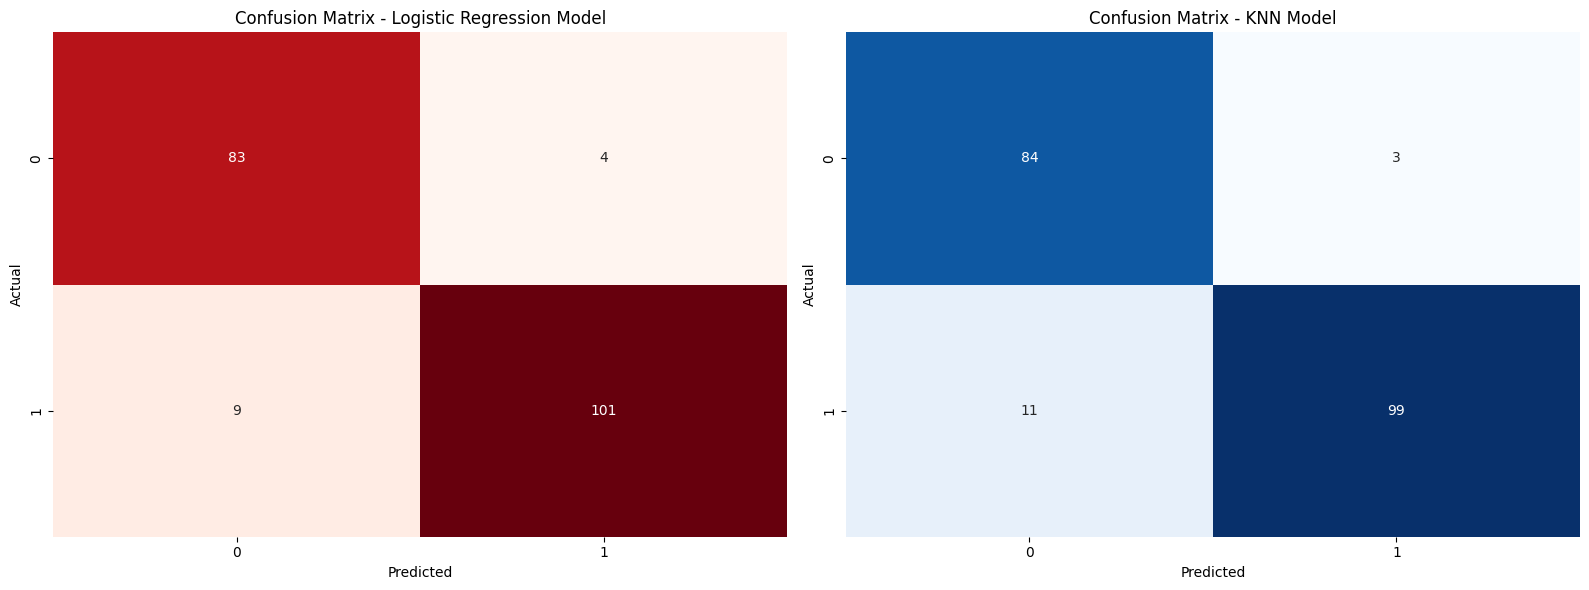

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', cbar=False, ax=axs[0])
axs[0].set_title('Confusion Matrix - Logistic Regression Model')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='g', cbar=False, ax=axs[1])
axs[1].set_title('Confusion Matrix - KNN Model')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

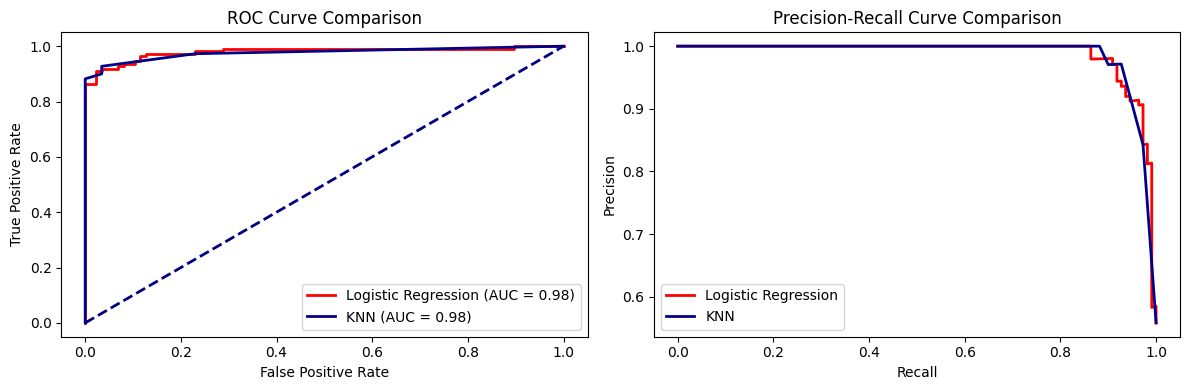

In [42]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

fpr_logreg, tpr_logreg, _ = roc_curve(Y_test, logreg_model.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
fpr_knn, tpr_knn, _ = roc_curve(Y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

precision_logreg, recall_logreg, _ = precision_recall_curve(Y_test, logreg_model.predict_proba(X_test)[:, 1])
precision_knn, recall_knn, _ = precision_recall_curve(Y_test, knn_model.predict_proba(X_test)[:, 1])

# ROC Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr_logreg, tpr_logreg, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_knn, tpr_knn, color='darkblue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

# Precision-Recall Curves
plt.subplot(1, 2, 2)
plt.plot(recall_logreg, precision_logreg, color='red', lw=2, label='Logistic Regression')
plt.plot(recall_knn, precision_knn, color='darkblue', lw=2, label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()

plt.tight_layout()
plt.show()

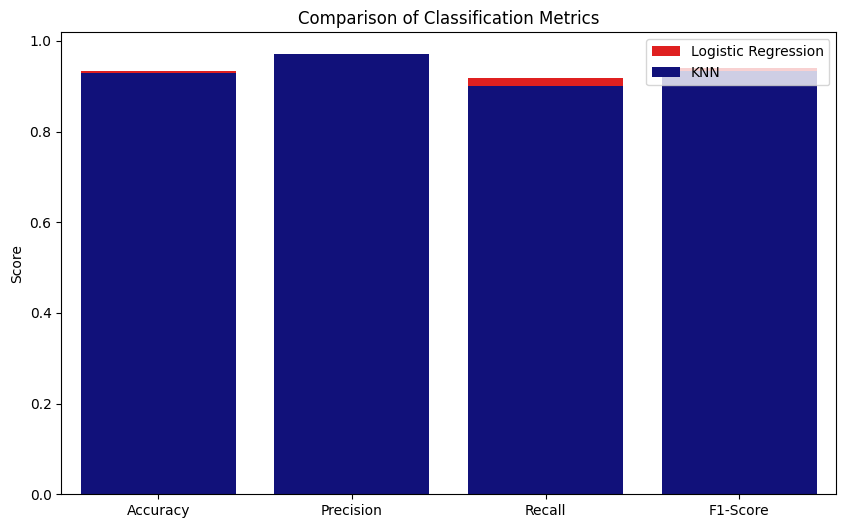

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# Metrics math
accuracy_logreg = accuracy_score(Y_test, Y_pred)
precision_logreg = precision_score(Y_test, Y_pred)
recall_logreg = recall_score(Y_test, Y_pred)
f1_logreg = f1_score(Y_test, Y_pred)

accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
precision_knn = precision_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
logreg_scores = [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg]
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=logreg_scores, color='red', label='Logistic Regression')
sns.barplot(x=metrics, y=knn_scores, color='darkblue', label='KNN')
plt.title('Comparison of Classification Metrics')
plt.ylabel('Score')
plt.legend()
plt.show()

Both logistic regression and K-Nearest Neighbors (KNN) models exhibit high accuracy and balanced performance, with logistic regression *slightly* outperforming KNN on the provided dataset.